# Analise descritiva

## Carregar dados tratados

In [347]:
# ! pip install seaborn
# ! pip install plotly
# ! pip install statsmodels
# ! pip install sklearn

In [369]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

import joblib

In [349]:
df = joblib.load("../out/database_unico.joblib")

df = df.iloc[:, 1:]

In [350]:
df['decisao'].value_counts(normalize=True).map("{:.1%}".format)
fig = px.histogram(df, x="decisao", color="decisao")
fig.show()

In [351]:
df

,RPL,ROE,ROA,AF,RA,GA,ML,decisao
0,-0.105253,-0.105253,-0.016222,6.488153,-0.016222,0.172112,-0.094254,0
1,-0.104673,-0.104673,-0.018332,5.709798,-0.018332,0.275444,-0.066555,0
2,-0.027526,-0.027526,-0.004677,5.884993,-0.004677,0.164357,-0.028459,1
3,-0.032876,-0.032876,-0.005308,6.193049,-0.005308,0.263596,-0.020139,1
4,-0.018787,-0.018787,-0.002987,6.288936,-0.002987,0.277509,-0.010765,1
...,...,...,...,...,...,...,...,...
1669,0.030807,0.030807,0.009171,3.359034,0.009171,0.132155,0.069398,1
1670,0.031875,0.031875,0.009289,3.431660,0.009289,0.140275,0.066217,1
1671,0.024589,0.024589,0.008690,2.829619,0.008690,0.114133,0.076137,0
1672,0.020095,0.020095,0.007375,2.724519,0.007375,0.114956,0.064159,1


In [352]:
def print_correlacoes(df):
    correlacoes = df.corr()

    print(df.describe())

    print(correlacoes)

    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(correlacoes, cmap="Wistia", ax=ax)
    plt.show()

               RPL          ROE          ROA           AF           RA  \
count  1674.000000  1674.000000  1674.000000  1674.000000  1674.000000   
mean      0.036077     0.036077     0.009039     3.592632     0.009039   
std       0.546275     0.546275     0.035960    11.796679     0.035960   
min      -4.408585    -4.408585    -0.965050  -267.278302    -0.965050   
25%       0.007132     0.007132     0.001964     1.861268     0.001964   
50%       0.026461     0.026461     0.009632     2.489481     0.009632   
75%       0.050185     0.050185     0.019091     4.100931     0.019091   
max      19.719121    19.719121     0.264753   167.498981     0.264753   

                GA           ML      decisao  
count  1674.000000  1674.000000  1674.000000  
mean      0.157492     0.059437     0.501195  
std       0.135789    27.218248     0.500148  
min      -0.179092  -640.913127     0.000000  
25%       0.080802     0.011380     0.000000  
50%       0.123475     0.076160     1.000000  
75% 

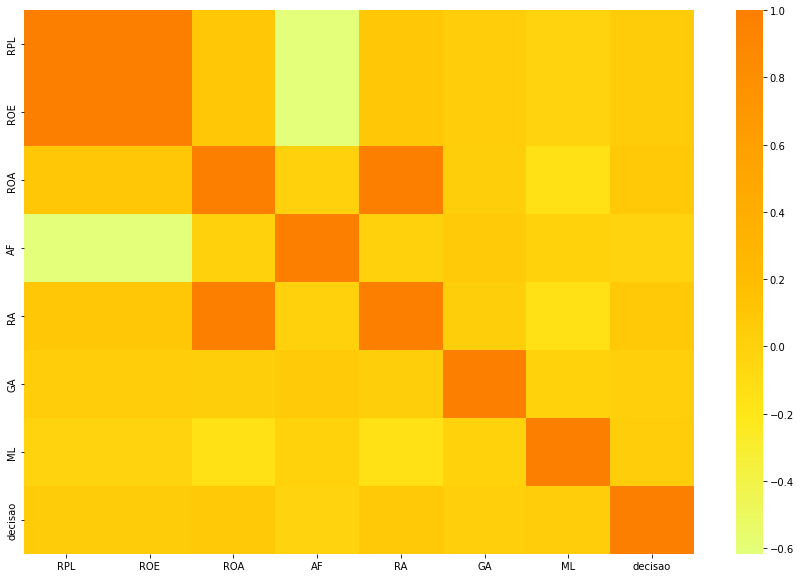

In [353]:
print_correlacoes(df)

               ROE          ROA      decisao
count  1674.000000  1674.000000  1674.000000
mean      0.036077     0.009039     0.501195
std       0.546275     0.035960     0.500148
min      -4.408585    -0.965050     0.000000
25%       0.007132     0.001964     0.000000
50%       0.026461     0.009632     1.000000
75%       0.050185     0.019091     1.000000
max      19.719121     0.264753     1.000000
              ROE       ROA   decisao
ROE      1.000000  0.097146  0.056338
ROA      0.097146  1.000000  0.082430
decisao  0.056338  0.082430  1.000000


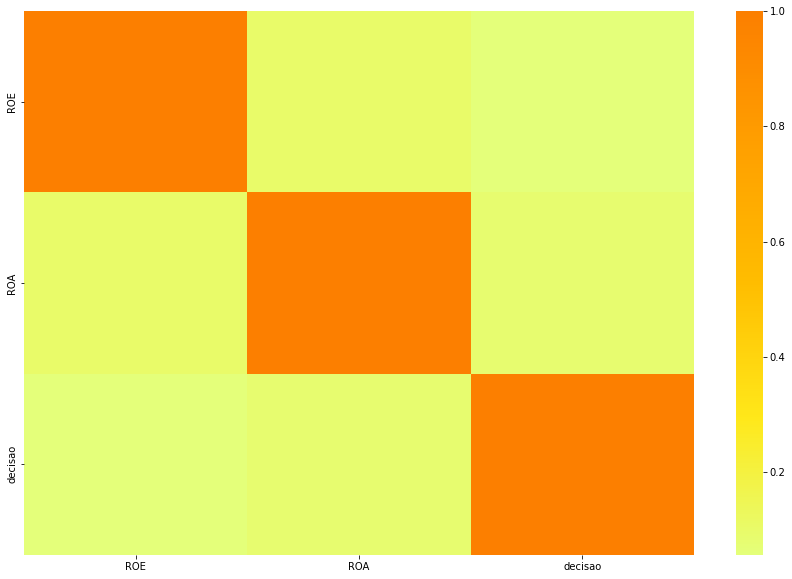

In [354]:
# remover = ["RPL", "RA", "AF"]
# remover = ["RPL", "RA"] # LogReg
# remover = ["RPL", "RA", "AF", "GA"] # RN
remover = ["RPL", "RA", "AF", "GA", "ML"] # RN
df = df.drop(remover, axis=1)

print_correlacoes(df)

## P value

In [355]:
all_col = " + ".join(df.drop("decisao", axis=1).columns)
model = smf.glm(formula="decisao ~ " + all_col, data=df,
                family = sm.families.Binomial()).fit()

print(model.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                decisao   No. Observations:                 1674
Model:                            GLM   Df Residuals:                     1671
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1149.2
Date:                Sun, 03 Oct 2021   Deviance:                       2298.4
Time:                        19:09:28   Pearson chi2:                 1.70e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01320
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0760      0.054     -1.400      0.1

In [356]:
print(df.shape)

(1674, 3)


## Feature selection

In [357]:
modelo = ExtraTreesClassifier(random_state=1)
x = df.drop("decisao", axis=1)
y = df["decisao"]
modelo.fit(x, y)

caracteristicas_importantes = pd.DataFrame(modelo.feature_importances_, x.columns).sort_values(by=0, ascending=False)
print(caracteristicas_importantes)

            0
ROA  0.500287
ROE  0.499713


In [358]:
def ajustar_scaler(tabela_original):
    scaler = StandardScaler()
    tabela_auxiliar = tabela_original.drop("decisao", axis=1)
    
    tabela_auxiliar = pd.DataFrame(scaler.fit_transform(tabela_auxiliar), tabela_auxiliar.index, tabela_auxiliar.columns)
    tabela_auxiliar["decisao"] = tabela_original["decisao"]
    return tabela_auxiliar

# nova_base_dados = ajustar_scaler(df)
nova_base_dados = df

print(df)
print(nova_base_dados)

           ROE       ROA  decisao
0    -0.105253 -0.016222        0
1    -0.104673 -0.018332        0
2    -0.027526 -0.004677        1
3    -0.032876 -0.005308        1
4    -0.018787 -0.002987        1
...        ...       ...      ...
1669  0.030807  0.009171        1
1670  0.031875  0.009289        1
1671  0.024589  0.008690        0
1672  0.020095  0.007375        1
1673 -0.003682 -0.001283        1

[1674 rows x 3 columns]
           ROE       ROA  decisao
0    -0.105253 -0.016222        0
1    -0.104673 -0.018332        0
2    -0.027526 -0.004677        1
3    -0.032876 -0.005308        1
4    -0.018787 -0.002987        1
...        ...       ...      ...
1669  0.030807  0.009171        1
1670  0.031875  0.009289        1
1671  0.024589  0.008690        0
1672  0.020095  0.007375        1
1673 -0.003682 -0.001283        1

[1674 rows x 3 columns]


In [359]:
X = nova_base_dados.drop(["decisao"], axis=1)
y = nova_base_dados["decisao"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)

print(f"{len(X_treino)=} {len(X_teste)=} {len(y_treino)=} {len(y_teste)=}")

len(X_treino)=1171 len(X_teste)=503 len(y_treino)=1171 len(y_teste)=503


## Dummy selection para avaliar uma selecao randomica de compra e venda

In [360]:
dummy = DummyClassifier(strategy="stratified", random_state=2)
dummy.fit(X_treino, y_treino)
previsao_dummy = dummy.predict(X_teste)

Dummy
Reporte teste
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       250
           1       0.51      0.51      0.51       253

    accuracy                           0.50       503
   macro avg       0.50      0.50      0.50       503
weighted avg       0.50      0.50      0.50       503



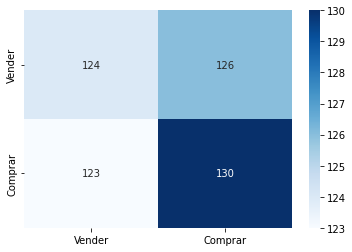

##################################################


In [361]:
def avaliar(y_teste, previsoes, nome_modelo):
    print(nome_modelo)
    print("Reporte teste")
    report = classification_report(y_teste, previsoes)
    print(report)
    cf_matrix = pd.DataFrame(confusion_matrix(y_teste, previsoes), index=["Vender", "Comprar"], columns=["Vender", "Comprar"])
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt=',')
    plt.show()
    print("#" * 50)
    
    
avaliar(y_teste, previsao_dummy, "Dummy")

# ML modelos

## Modelos a serem testados

- AdaBoost
- Decision Tree
- Random Forest
- ExtraTree
- Gradient Boost
- K Nearest Neighbors (KNN)
- Logistic Regression
- Rede Neural

AdaBoost
Reporte teste
              precision    recall  f1-score   support

           0       0.52      0.55      0.54       250
           1       0.53      0.51      0.52       253

    accuracy                           0.53       503
   macro avg       0.53      0.53      0.53       503
weighted avg       0.53      0.53      0.53       503



/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



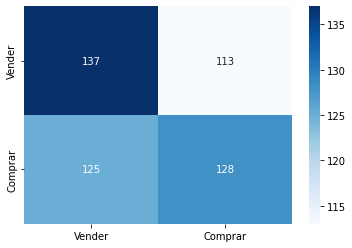

##################################################
DecisionTree
Reporte teste
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       250
           1       0.53      0.51      0.52       253

    accuracy                           0.52       503
   macro avg       0.52      0.52      0.52       503
weighted avg       0.52      0.52      0.52       503



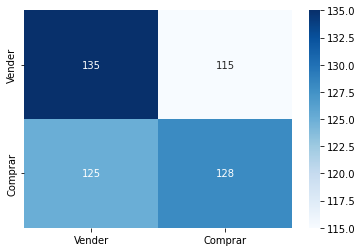

##################################################
RandomForest
Reporte teste
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       250
           1       0.52      0.52      0.52       253

    accuracy                           0.52       503
   macro avg       0.52      0.52      0.52       503
weighted avg       0.52      0.52      0.52       503



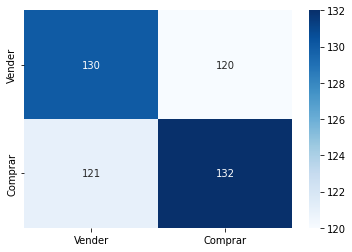

##################################################
ExtraTree
Reporte teste
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       250
           1       0.53      0.55      0.54       253

    accuracy                           0.53       503
   macro avg       0.53      0.53      0.53       503
weighted avg       0.53      0.53      0.53       503



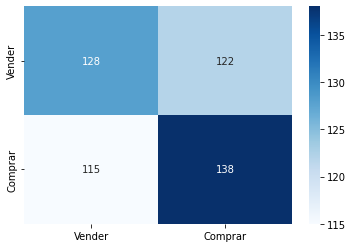

##################################################
GradientBoost
Reporte teste
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       250
           1       0.56      0.57      0.56       253

    accuracy                           0.56       503
   macro avg       0.56      0.56      0.56       503
weighted avg       0.56      0.56      0.56       503



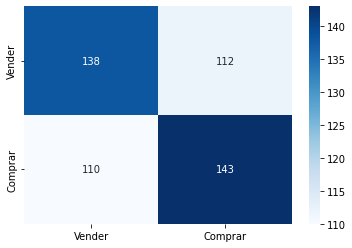

##################################################
KNN
Reporte teste
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       250
           1       0.52      0.51      0.52       253

    accuracy                           0.52       503
   macro avg       0.52      0.52      0.52       503
weighted avg       0.52      0.52      0.52       503



/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



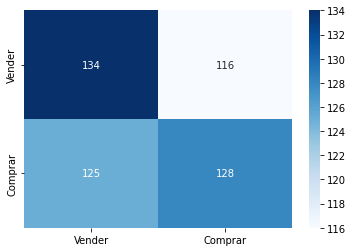

##################################################
LogisticRegression
Reporte teste
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       250
           1       0.58      0.58      0.58       253

    accuracy                           0.58       503
   macro avg       0.58      0.58      0.58       503
weighted avg       0.58      0.58      0.58       503



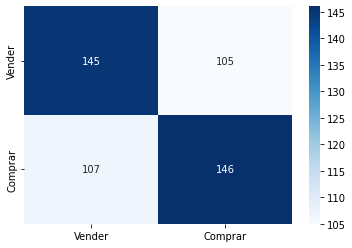

##################################################
RedeNeural
Reporte teste
              precision    recall  f1-score   support

           0       0.56      0.52      0.54       250
           1       0.56      0.60      0.58       253

    accuracy                           0.56       503
   macro avg       0.56      0.56      0.56       503
weighted avg       0.56      0.56      0.56       503



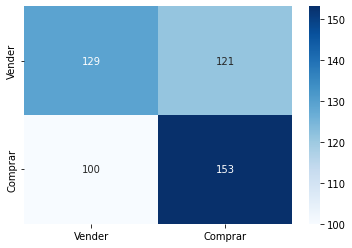

##################################################


In [367]:
modelos = {
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "ExtraTree": ExtraTreesClassifier(random_state=1),
    "GradientBoost": GradientBoostingClassifier(random_state=1),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(C=1.0, max_iter=100, tol=0.0001, random_state=1, solver="newton-cg",
                            fit_intercept=True, intercept_scaling=1, l1_ratio=None, penalty="none", warm_start=False),
    # "LogisticRegression": LogisticRegression(C=1.0, max_iter=100, tol=0.0001, random_state=1, solver="newton-cg"),
    "RedeNeural": MLPClassifier(random_state=1, max_iter=100),
}

for nome_modelo in modelos:
    modelo = modelos[nome_modelo]
    modelo.fit(X_treino, y_treino)
    previsoes = modelo.predict(X_teste)
    avaliar(y_teste, previsoes, nome_modelo)
    modelos[nome_modelo] = modelo

## Escolha de 3 melhores modelos para comparação

In [375]:
modelo_final = modelos["RandomForest"]

n_estimators = range(10, 251, 30)
max_features = list()
max_features.append('auto')

precision2_score = make_scorer(precision_score, labels=[2], average='macro')

grid = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'n_estimators': n_estimators,
            'max_features': max_features,
            'random_state': [1],
        },
        scoring=precision2_score,
)

resultado_grid = grid.fit(X_treino, y_treino)
print("Ajuste feito")

/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicte

Ajuste feito


/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



RandomForest Tunado
Reporte teste
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       250
           1       0.52      0.50      0.51       253

    accuracy                           0.52       503
   macro avg       0.52      0.52      0.52       503
weighted avg       0.52      0.52      0.52       503



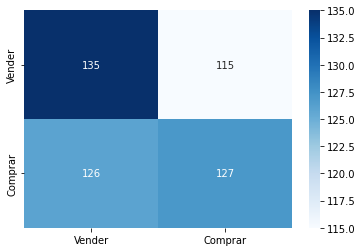

##################################################


In [376]:
modelo_tunado = resultado_grid.best_estimator_
previsoes = modelo_tunado.predict(X_teste)
avaliar(y_teste, previsoes, "RandomForest Tunado")